# Change background of blue screen images
### In this notebook we are going to pass through all the steps to create a background changers using only Python, Numpy, OpenCv and Matplotlib to show the images.

# Import resources

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Read and display the images

### Import and show the image of interest

In [2]:
#load the image that we want to change its background
image = cv2.imread("images/women_blue_screen.jpg")

#print the type of image and its dimensions
print("data type : ", type(image),
      " with dimensions : ", image.shape)


data type :  <class 'numpy.ndarray'>  with dimensions :  (500, 500, 3)


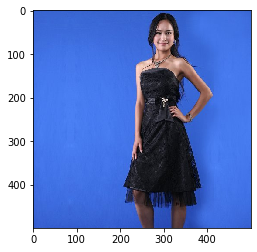

In [3]:
%matplotlib inline

#make a copy of the image
image_copy = np.copy(image)

#change the image from BGR to RGB
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

#display the image
plt.imshow(image_copy)

### Import and show the background image

the dimensions of this image are (1350, 1500, 3)


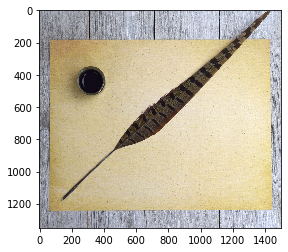

In [4]:
# load the background image
background_image = cv2.imread("images/background_01.jpg")

#make a copy of the background image
background_image_copy = np.copy(background_image)

#convert the image fron BGR to RGB
background_image_copy = cv2.cvtColor(background_image_copy, cv2.COLOR_BGR2RGB)

# print the shape of the background image
print("the dimensions of this image are", background_image.shape)

# show the image
plt.imshow(background_image_copy)

## Create the blue color threshold boundaries

In [5]:
#lets define the lower and upper bound for the color that we want to isolate "Blue"
lower_blue = np.array([40, 75, 180])
upper_blue = np.array([80, 130, 255])

## Create a mask to isolate the blue screen area based on the lower and upper bounds

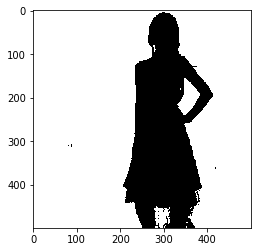

In [6]:
#define the mask
mask = cv2.inRange(image_copy, lower_blue, upper_blue)

#visualise the mask
plt.imshow(mask, cmap="gray")

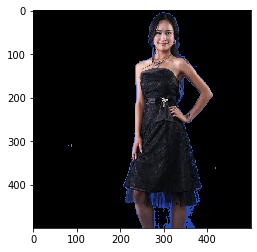

In [7]:
#mask the image to let the women show through
masked_image = np.copy(image_copy)

masked_image[mask != 0] = [0, 0, 0]

#display the msked image
plt.imshow(masked_image)

### Add a background image to the masked image

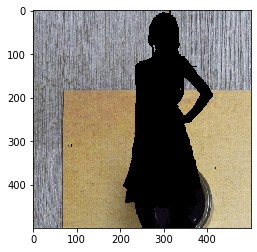

In [8]:
# cropp the backgroudn image to fit the masked image
cropped_background_image = background_image_copy[0:500, 0:500]

#make a copy of the cropped backgroud image
masked_background_image = np.copy(cropped_background_image)

# mask the crooped image but this time the women area is blocked
masked_background_image[mask == 0] = [0, 0, 0]

# show the masked background image
plt.imshow(masked_background_image)

### Now the magic happens just by adding the two images together to create a new image

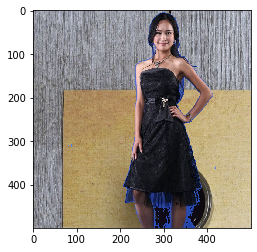

In [9]:
# add the two images to create a new image
complete_image = masked_image + masked_background_image

plt.imshow(complete_image)

# Now we are going to follow a different method to isolate the desired area in a given image
We are going to work with HSV color space instead of RGB color space. We will use the H channel values in HSV color space to isolate the desired area because it's values are very consistent in shadow and excessive brightness compared to RGB color space.

### Importing the new images

Dimensions are:  (900, 1200, 3)


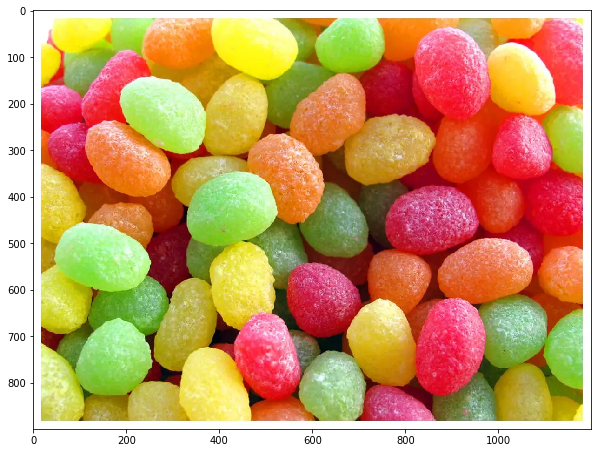

In [10]:
#import candies image
candiesImg = cv2.imread("images/candies.jpg")

#make a copy og the image
candiesImgCopy = np.copy(candiesImg)

#convert from BGR to RGB
candiesImgCopy = cv2.cvtColor(candiesImgCopy, cv2.COLOR_BGR2RGB)

#print the shape
print("Dimensions are: ", candiesImg.shape)

#show the image
fig, axx = plt.subplots(figsize = (10, 10))
axx.imshow(candiesImgCopy)

Dimentions are :  (1080, 1920, 3)


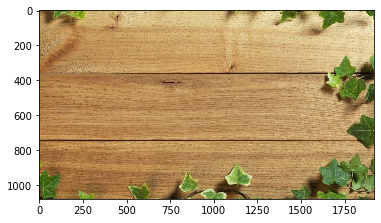

In [11]:
#import wood-table-background
woodBackgroundImg = cv2.imread("images/wood-table-background.jpg")

#make a copy of the image
woodBackgroundImgCopy = np.copy(woodBackgroundImg)

#convert from BGR to RGB
woodBackgroundImgCopy = cv2.cvtColor(woodBackgroundImgCopy, cv2.COLOR_BGR2RGB)

#print the shape of this image
print("Dimentions are : ", woodBackgroundImg.shape)

#show the image
plt.imshow(woodBackgroundImgCopy)

### Now we will show Three different images respectively to red, Green and Blue channels

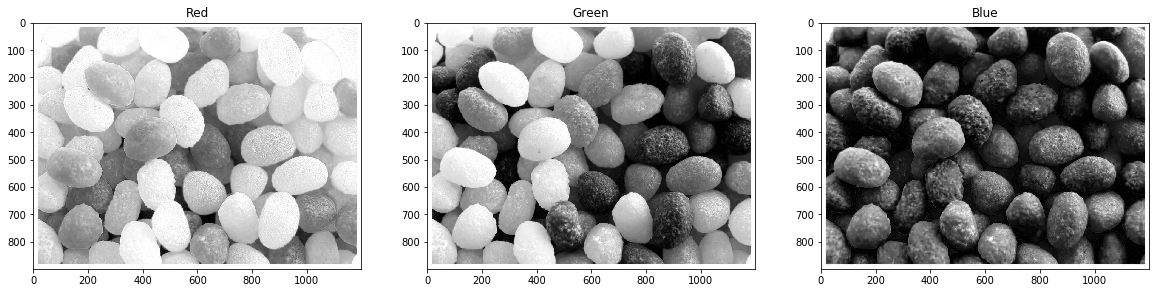

In [12]:
#separating the channels in three diffrenet variables
redCandiesImg = candiesImgCopy[:, :, 0]
greenCandiesImg = candiesImgCopy[:, :, 1]
blueCandiesImg = candiesImgCopy[:, :, 2]

#showing the images in a figure with three columns horizontally
figure, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))

ax1.set_title("Red")
ax1.imshow(redCandiesImg, cmap="gray")

ax2.set_title("Green")
ax2.imshow(greenCandiesImg, cmap="gray")

ax3.set_title("Blue")
ax3.imshow(blueCandiesImg, cmap="gray")

### Convert the image from RGB o HSV
After converting we are going to repeat the same process as before to show three images of the three channels.

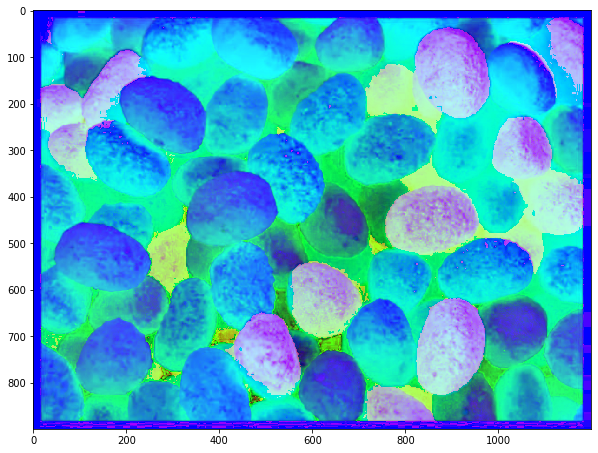

In [13]:
#convert from RGB to HSV
hsvCandiesImg = cv2.cvtColor(candiesImgCopy, cv2.COLOR_RGB2HSV)

#sho the HSV image
f, ax = plt.subplots(figsize = (10, 10))

ax.imshow(hsvCandiesImg)

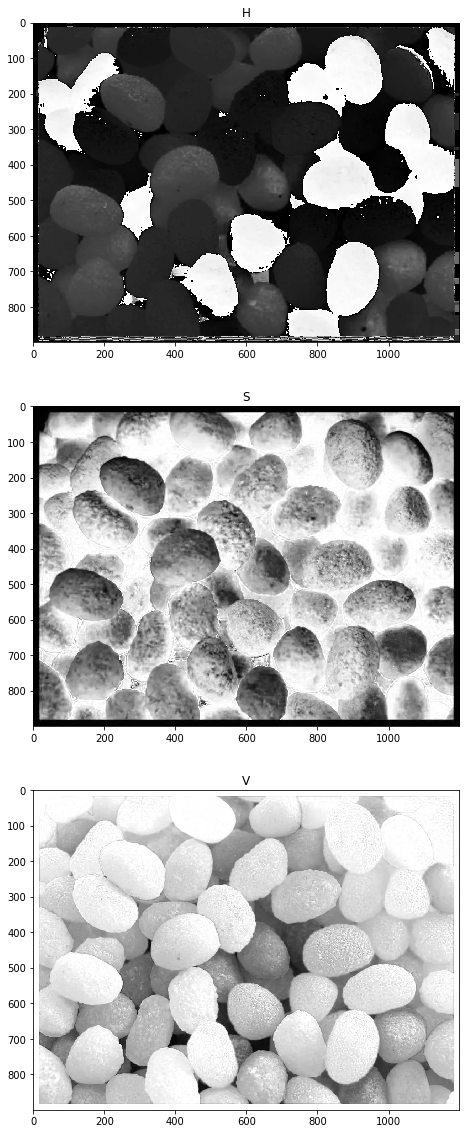

In [14]:
#separating the channels in three diffrenet variables
hCandiesImg = hsvCandiesImg[:, :, 0]
sCandiesImg = hsvCandiesImg[:, :, 1]
vCandiesImg = hsvCandiesImg[:, :, 2]

#showing the images in a figure with three columns horizontally
figure, (ax1, ax2, ax3) = plt.subplots(3, figsize = (10, 20))

ax1.set_title("H")
ax1.imshow(hCandiesImg, cmap="gray")

ax2.set_title("S")
ax2.imshow(sCandiesImg, cmap="gray")

ax3.set_title("V")
ax3.imshow(vCandiesImg, cmap="gray")

## Creating the mask for this HSV image

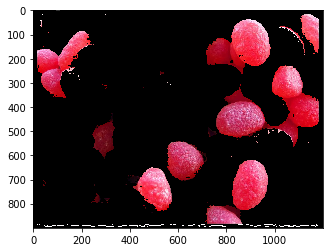

In [15]:
#mask boundaries
lower_h = np.array([130, 0, 0])
upper_h = np.array([180, 255, 255])

#define the masked area
maskHsv = cv2.inRange(hsvCandiesImg, lower_h, upper_h)

#creating a copy if candies image and masking the image
maskedCandiesImg = np.copy(candiesImgCopy)
maskedCandiesImg[maskHsv == 0] = [0, 0, 0]

#show the masked HSV image
plt.imshow(maskedCandiesImg)

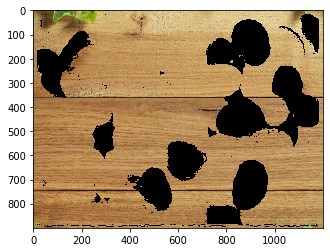

In [16]:
#cropp the wood background image
croppedWoodBackgroundImg = woodBackgroundImgCopy[0:900, 0:1200]

#amke a copy of the image
maskedWoodBackgroundImg = np.copy(croppedWoodBackgroundImg)

#mask the inverse of background image
maskedWoodBackgroundImg[maskHsv != 0] = [0, 0, 0]

#show the maskd background image
plt.imshow(maskedWoodBackgroundImg)

### Now we will add the two images together

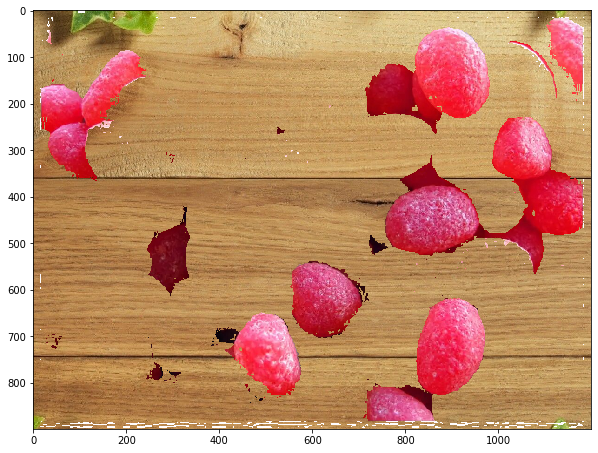

In [17]:
#adding the two images together
completeCandiesImg = maskedWoodBackgroundImg + maskedCandiesImg

#showing the final image
figg, axs = plt.subplots(figsize = (10, 10))
axs.imshow(completeCandiesImg)

# Now let's apply the HSV background changing operation to new images of Van Damme and a background of a house
This two images have an equal size of (1366, 768) pxels, so we do not need to cropp one of them.

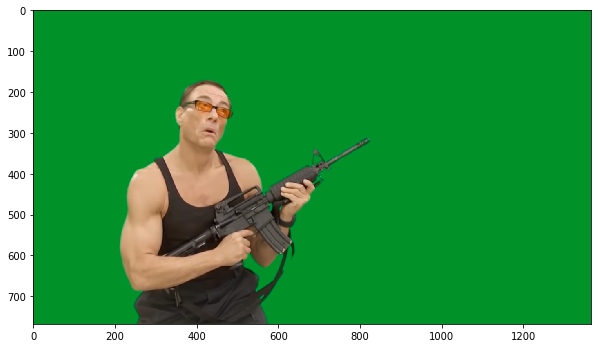

In [26]:
#import Van Damme image and show it
vanDammeImg = cv2.imread("images/van_damme.png")

#convert the image to RGB
vanDammeImgCopy = np.copy(vanDammeImg)
vanDammeImgCopy = cv2.cvtColor(vanDammeImgCopy, cv2.COLOR_BGR2RGB)

#show the image
f, ax = plt.subplots(figsize = (10, 10))
ax.imshow(vanDammeImgCopy)

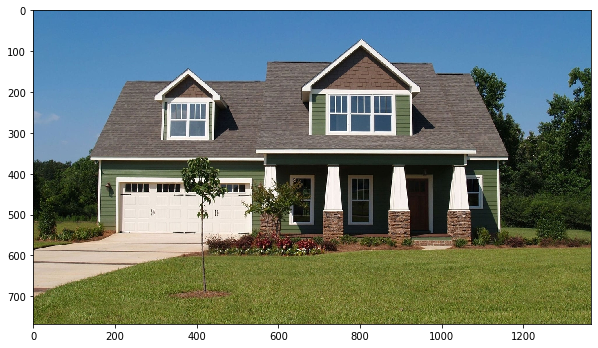

In [27]:
#import house background image
houseBackgroundImg = cv2.imread("images/house.jpg")

#convert the image to RGB
houseBackgroundImgCopy = np.copy(houseBackgroundImg)
houseBackgroundImgCopy = cv2.cvtColor(houseBackgroundImgCopy, cv2.COLOR_BGR2RGB)

#show the image
f, ax = plt.subplots(figsize = (10, 10))
ax.imshow(houseBackgroundImgCopy)

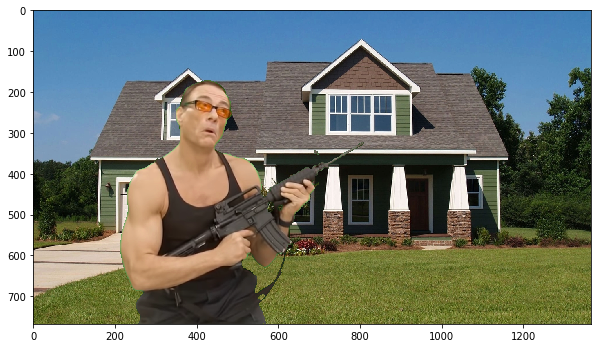

In [43]:
#make a copy of women image
imageHsv = np.copy(vanDammeImg)

#make a copy of background image and crop the image
backgroundImgHsv = np.copy(houseBackgroundImg)

#now let's change the color space from BGR to HSV
#remeber we are copying from the original images with BGR color space
imageHsv = cv2.cvtColor(imageHsv, cv2.COLOR_BGR2HSV)
backgroundImgHsv = cv2.cvtColor(backgroundImgHsv, cv2.COLOR_BGR2HSV)

#defining the mask boundaries
lowerMaskH = np.array([58, 0, 0])
upperMaskH = np.array([90, 255, 255])

#define the masked area
maskedArea = cv2.inRange(imageHsv, lowerMaskH, upperMaskH)

#mask the women image
maskedImageHsv = np.copy(imageHsv)
maskedImageHsv[maskedArea != 0] = [0, 0, 0]

#mask the background image
maskedBackgroundImgHsv = np.copy(backgroundImgHsv)
maskedBackgroundImgHsv[maskedArea == 0] = [0, 0, 0]

#and now merge the two images together 
finalImage = maskedImageHsv + maskedBackgroundImgHsv

#convert the finak image from HSV to RGB
finalImageRgb = cv2.cvtColor(finalImage, cv2.COLOR_HSV2RGB)

#show the final image 
figg, axss = plt.subplots(figsize = (10, 10))
axss.imshow(finalImageRgb)